In [10]:
import json

from sqlalchemy import create_engine
import pandas as pd

from data_generator.main import DiscriminationData
from path import HERE

DB_PATH = HERE.joinpath('experiments/discrimination_detection_results6.db')
conn = create_engine(f'sqlite:///{DB_PATH}')
query = """
with s1 as (SELECT ex.experiment_id,
                   am.analysis_id,
                   am.method_name,
                   ex.status,
                   er.group_key,

                   json_extract(ex.config, '$.aequitas_global_iteration_limit') as aequitas_global_iteration_limit,
                   json_extract(ex.config, '$.aequitas_local_iteration_limit')  as aequitas_local_iteration_limit,
                   json_extract(ex.config, '$.aequitas_model_type')             as aequitas_model_type,
                   json_extract(ex.config, '$.aequitas_perturbation_unit')      as aequitas_perturbation_unit,
                   json_extract(ex.config, '$.aequitas_threshold')              as aequitas_threshold,
                   json_extract(ex.config, '$.bias_scan_favorable_value')       as bias_scan_favorable_value,
                   json_extract(ex.config, '$.bias_scan_mode')                  as bias_scan_mode,
                   json_extract(ex.config, '$.bias_scan_n_estimators')          as bias_scan_n_estimators,
                   json_extract(ex.config, '$.bias_scan_num_iters')             as bias_scan_num_iters,
                   json_extract(ex.config, '$.bias_scan_random_state')          as bias_scan_random_state,
                   json_extract(ex.config, '$.bias_scan_scoring')               as bias_scan_scoring,
                   json_extract(ex.config, '$.bias_scan_test_size')             as bias_scan_test_size,
                   json_extract(ex.config, '$.expga_max_global')                as expga_max_global,
                   json_extract(ex.config, '$.expga_max_local')                 as expga_max_local,
                   json_extract(ex.config, '$.expga_threshold')                 as expga_threshold,
                   json_extract(ex.config, '$.expga_threshold_rank')            as expga_threshold_rank,
                   json_extract(ex.config, '$.max_group_size')                  as max_group_size,
                   json_extract(ex.config, '$.max_number_of_classes')           as max_number_of_classes,
                   json_extract(ex.config, '$.min_number_of_classes')           as min_number_of_classes,
                   json_extract(ex.config, '$.mlcheck_iteration_no')            as mlcheck_iteration_no,
                   json_extract(ex.config, '$.nb_attributes')                   as nb_attributes,
                   json_extract(ex.config, '$.nb_categories_outcome')           as nb_categories_outcome,
                   json_extract(ex.config, '$.nb_groups')                       as nb_groups,
                   json_extract(ex.config, '$.prop_protected_attr')             as prop_protected_attr,

                   CAST(er.calculated_aleatoric AS float)                       AS calculated_aleatoric,
                   CAST(er.calculated_epistemic AS float)                       AS calculated_epistemic,

                   CAST(er.calculated_granularity AS float)                     AS calculated_granularity,
                   CAST(er.calculated_group_size AS float)                      AS calculated_group_size,
                   CAST(er.calculated_intersectionality AS float)               AS calculated_intersectionality,
                   CAST(er.calculated_magnitude AS float)                       AS calculated_magnitude,
                   CAST(er.calculated_similarity AS float)                      AS calculated_similarity,
                   CAST(er.calculated_subgroup_ratio AS float)                  AS calculated_subgroup_ratio,
                   CAST(er.calculated_uncertainty AS float)                     AS calculated_uncertainty,

                   CAST(er.synthetic_group_size AS integer)                     AS synthetic_group_size,
                   CAST(er.nb_unique_indv AS integer)                           AS nb_unique_indv,

                   CAST(er.num_exact_couple_matches AS integer)                 AS num_exact_couple_matches,
                   CAST(er.num_new_group_couples AS integer)                    AS num_new_group_couples,
                   num_new_group_couples / CAST(nb_unique_indv AS FLOAT)        as prop_of_new_individuals_found,
                   num_exact_couple_matches / CAST(nb_unique_indv AS FLOAT)   as prop_of_orig_individuals_found


            FROM experiments ex
                     join main.analysis_metadata am on ex.experiment_id = am.experiment_id
                     left join main.evaluated_results er on am.analysis_id = er.analysis_id
            WHERE status = 'completed')
SELECT *
FROM s1
-- ORDER BY prop_of_new_individuals_found DESC
"""

df = pd.read_sql_query(query, conn)
df = df.loc[:, ~df.T.duplicated()]
df = df[(~df['prop_of_new_individuals_found'].isna())&(~df['prop_of_orig_individuals_found'].isna())]
df

,experiment_id,analysis_id,method_name,status,group_key,aequitas_global_iteration_limit,aequitas_local_iteration_limit,aequitas_model_type,aequitas_perturbation_unit,aequitas_threshold,...,calculated_magnitude,calculated_similarity,calculated_subgroup_ratio,calculated_uncertainty,synthetic_group_size,nb_unique_indv,num_exact_couple_matches,num_new_group_couples,prop_of_new_individuals_found,prop_of_orig_individuals_found
0,11e871b3-b5af-4954-95b5-dcb50a222bbe,ded9a75f-3d6e-4ee4-bd79-d3478ce20b33,aequitas,completed,*|*|*|*|*|*|*|*|0|1-*|*|*|*|*|*|*|*|1|0,25,3,RandomForest,0.25,0.2,...,0.000000,0.000000,1.000000,0.055820,196,191,0,0,0.0,0.0
1,11e871b3-b5af-4954-95b5-dcb50a222bbe,ded9a75f-3d6e-4ee4-bd79-d3478ce20b33,aequitas,completed,*|*|*|*|*|3|*|1|0|2-*|*|*|*|*|1|*|0|1|2,25,3,RandomForest,0.25,0.2,...,0.257576,0.250000,2.333333,0.065130,130,121,0,0,0.0,0.0
2,11e871b3-b5af-4954-95b5-dcb50a222bbe,ded9a75f-3d6e-4ee4-bd79-d3478ce20b33,aequitas,completed,*|*|*|*|1|1|*|*|0|0-*|*|*|*|2|0|*|*|1|0,25,3,RandomForest,0.25,0.2,...,0.369919,0.250000,2.870370,0.059000,209,198,0,0,0.0,0.0
3,11e871b3-b5af-4954-95b5-dcb50a222bbe,ded9a75f-3d6e-4ee4-bd79-d3478ce20b33,aequitas,completed,*|*|*|1|*|*|*|1|1|*-*|*|*|1|*|*|*|1|0|*,25,3,RandomForest,0.25,0.2,...,0.129887,0.666667,2.307692,0.065334,172,158,0,0,0.0,0.0
4,11e871b3-b5af-4954-95b5-dcb50a222bbe,ded9a75f-3d6e-4ee4-bd79-d3478ce20b33,aequitas,completed,*|0|*|*|*|*|0|*|*|*-*|1|*|*|*|*|0|*|*|*,25,3,RandomForest,0.25,0.2,...,0.000000,0.500000,1.000000,0.052315,26,26,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43310,7aa5b74b-52bd-424c-ad24-5404ae399d5e,ed87d209-63a6-4dcf-8bfd-c3a0f9ce6b82,biasscan,completed,3|2|0|*|1|2|1|2|0|*|*|*|*|2|1-2|1|0|*|0|1|0|1|...,100,10,RandomForest,1.00,0.0,...,0.166128,0.200000,1.764706,0.095920,282,273,0,0,0.0,0.0
43311,7aa5b74b-52bd-424c-ad24-5404ae399d5e,ed87d209-63a6-4dcf-8bfd-c3a0f9ce6b82,biasscan,completed,3|2|1|*|1|2|*|1|3|*|2|*|1|*|1-2|3|1|*|0|1|*|0|...,100,10,RandomForest,1.00,0.0,...,0.220398,0.500000,1.235955,0.086508,199,156,0,0,0.0,0.0
43312,7aa5b74b-52bd-424c-ad24-5404ae399d5e,ed87d209-63a6-4dcf-8bfd-c3a0f9ce6b82,biasscan,completed,3|2|1|0|0|*|0|*|0|*|*|1|*|0|*-2|1|1|0|1|*|0|*|...,100,10,RandomForest,1.00,0.0,...,0.128992,0.444444,1.128755,0.084542,496,475,0,0,0.0,0.0
43313,7aa5b74b-52bd-424c-ad24-5404ae399d5e,ed87d209-63a6-4dcf-8bfd-c3a0f9ce6b82,biasscan,completed,3|3|1|1|*|1|0|0|3|1|3|1|1|2|0-0|2|0|0|*|0|0|1|...,100,10,RandomForest,1.00,0.0,...,0.433555,0.142857,1.660714,0.090062,298,165,0,0,0.0,0.0



Analysis for prop_of_new_individuals_found:
--------------------------------------------------

calculated_aleatoric:
Average Treatment Effect: -0.0018
Correlation: -0.0337
P-value: 0.0000

calculated_epistemic:
Average Treatment Effect: 0.0010
Correlation: 0.0245
P-value: 0.0000

calculated_granularity:
Average Treatment Effect: -0.0019
Correlation: -0.0310
P-value: 0.0000

calculated_group_size:
Average Treatment Effect: -0.0008
Correlation: -0.0103
P-value: 0.0320

calculated_intersectionality:
Average Treatment Effect: -0.0012
Correlation: -0.0261
P-value: 0.0000

calculated_magnitude:
Average Treatment Effect: -0.0007
Correlation: -0.0092
P-value: 0.0565

calculated_similarity:
Average Treatment Effect: 0.0022
Correlation: 0.0333
P-value: 0.0000

calculated_subgroup_ratio:
Average Treatment Effect: -0.0004
Correlation: -0.0108
P-value: 0.0240

calculated_uncertainty:
Average Treatment Effect: -0.0017
Correlation: -0.0270
P-value: 0.0000

Analysis for prop_of_orig_individuals_foun

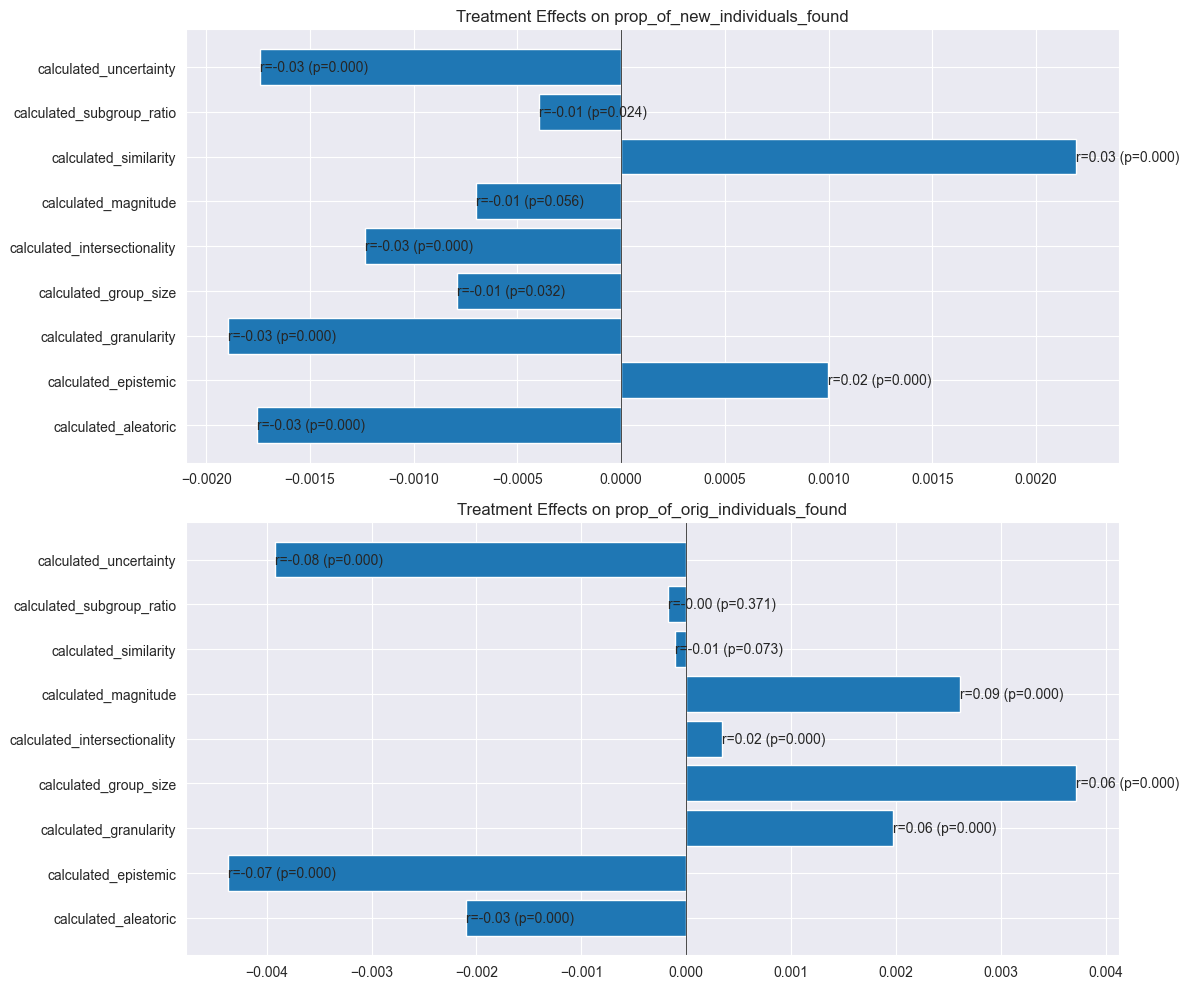

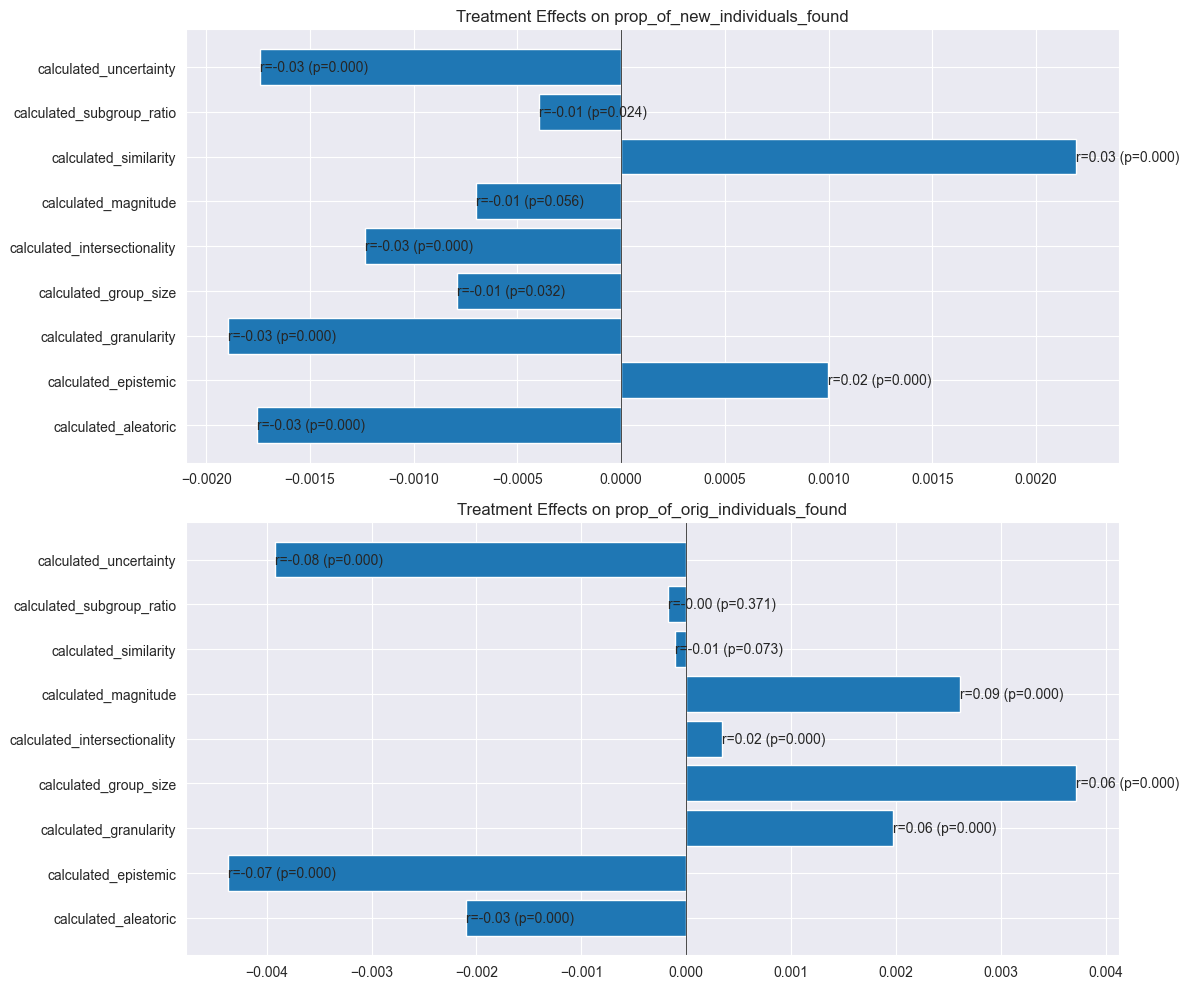

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_treatment_effects(df):
    # Get calculated columns (treatments) and outcome columns
    treatment_cols = [col for col in df.columns if col.startswith('calculated_')]
    outcome_cols = ['prop_of_new_individuals_found', 'prop_of_orig_individuals_found']

    # Initialize results dictionary
    results = {
        'treatment_effects': {},
        'correlations': {},
        'significance': {}
    }

    # Standardize treatment variables
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(df[treatment_cols]), columns=treatment_cols)

    # Analyze each outcome
    for outcome in outcome_cols:
        y = df[outcome]

        # 1. Basic correlation analysis
        correlations = {}
        for treatment in treatment_cols:
            corr, p_value = stats.pearsonr(df[treatment], y)
            correlations[treatment] = {
                'correlation': corr,
                'p_value': p_value
            }

        # 2. CATE Analysis using Random Forest
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

        treatment_effects = {}
        for treatment in treatment_cols:
            # Create binary treatment indicator (above/below median)
            treatment_median = df[treatment].median()
            T = (df[treatment] > treatment_median).astype(int)

            # Prepare features (excluding current treatment)
            X_subset = X.drop(columns=[treatment])

            # Fit model
            rf_model.fit(X_subset, y)

            # Calculate CATE
            treated_effect = rf_model.predict(X_subset[T == 1]).mean()
            control_effect = rf_model.predict(X_subset[T == 0]).mean()
            ate = treated_effect - control_effect

            treatment_effects[treatment] = {
                'ATE': ate,
                'treated_mean': treated_effect,
                'control_mean': control_effect
            }

        results['treatment_effects'][outcome] = treatment_effects
        results['correlations'][outcome] = correlations

    return results

def plot_treatment_effects(results):
    # Create figure with subplots for each outcome
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    for idx, outcome in enumerate(results['treatment_effects'].keys()):
        treatments = list(results['treatment_effects'][outcome].keys())
        effects = [results['treatment_effects'][outcome][t]['ATE'] for t in treatments]

        # Plot treatment effects
        ax = axes[idx]
        bars = ax.barh(treatments, effects)
        ax.set_title(f'Treatment Effects on {outcome}')
        ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

        # Add correlation values as text
        for i, treatment in enumerate(treatments):
            corr = results['correlations'][outcome][treatment]['correlation']
            p_val = results['correlations'][outcome][treatment]['p_value']
            ax.text(effects[i], i, f'r={corr:.2f} (p={p_val:.3f})',
                   verticalalignment='center')

    plt.tight_layout()
    return fig


# Run analysis
results = analyze_treatment_effects(df)

# Print detailed results
for outcome in results['treatment_effects'].keys():
    print(f"\nAnalysis for {outcome}:")
    print("-" * 50)

    for treatment in results['treatment_effects'][outcome].keys():
        effect_info = results['treatment_effects'][outcome][treatment]
        corr_info = results['correlations'][outcome][treatment]

        print(f"\n{treatment}:")
        print(f"Average Treatment Effect: {effect_info['ATE']:.4f}")
        print(f"Correlation: {corr_info['correlation']:.4f}")
        print(f"P-value: {corr_info['p_value']:.4f}")

# Create visualization
plot_treatment_effects(results)